### 1. 퍼셉트론: 가장 간단한 신경망

In [1]:
# 파이토치로 퍼셉트론 구현

import torch
import torch.nn as nn

class Perceptron(nn.Module):
    '''퍼셉트론은 하나의 선형 층'''
    def __init__(self, input_dim):
        '''
        매개변수: input_dim(int):일벽 특성의 크기
        '''
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, )
        
    def forward(self, x_in):
        '''퍼셉트론의 정방향 계산
        매개변수: x_in(torch.Tensor): 입력 데이터 텐서
        x_in.shape는 (batch, num_features) 입니다.
        반환값: 결과 텐서ㅓ. tensor.shape는 (batch,)입니다. '''
        
        return torch.sigmoid(self.fc1(x_in)).squeeze()

### 2. 활성화 함수

/var/folders/qg/kmnhbt9j4md891b99dsdbr9c0000gn/T/ipykernel_27887/86492689.py:6: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


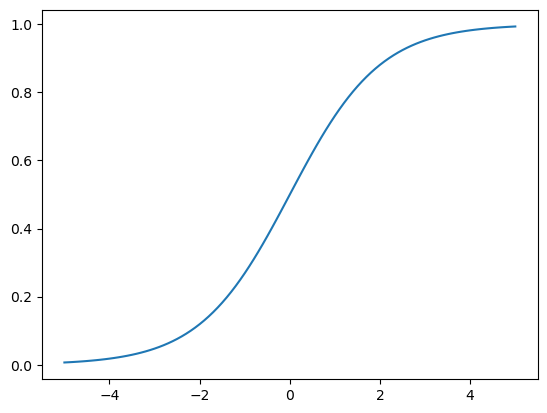

In [2]:
# 2.1 시그모이드

import torch
import matplotlib.pyplot as plt

x = torch.range(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

/var/folders/qg/kmnhbt9j4md891b99dsdbr9c0000gn/T/ipykernel_27887/2903606012.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


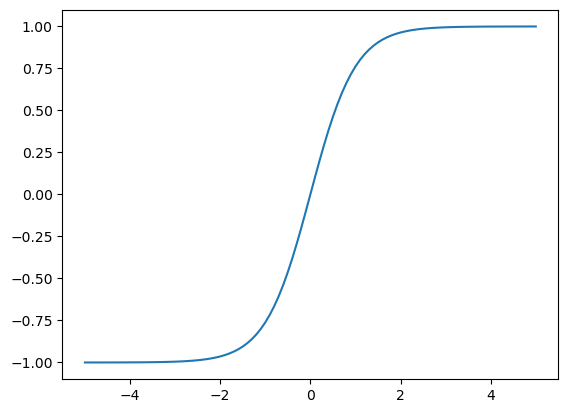

In [3]:
# 2.2 하이퍼볼릭 탄젠트

x = torch.range(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

/var/folders/qg/kmnhbt9j4md891b99dsdbr9c0000gn/T/ipykernel_27887/1243127081.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


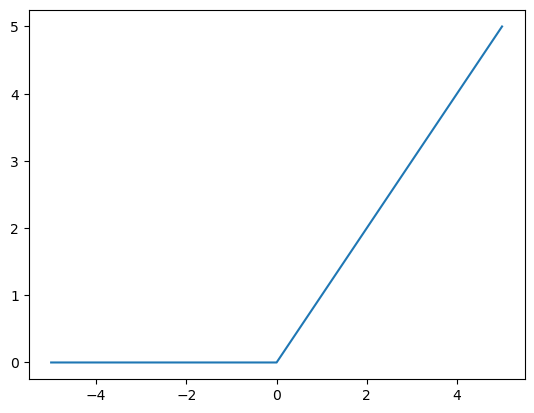

In [4]:
# 2.3 렐루

relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

/var/folders/qg/kmnhbt9j4md891b99dsdbr9c0000gn/T/ipykernel_27887/276514558.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


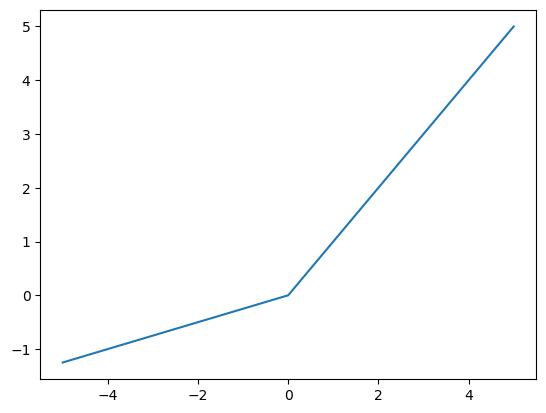

In [6]:
# 2.3.2 P렐루: f(x) = max(x, ax)

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

In [7]:
# 2.4 소프트맥스

softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.4074,  0.7434, -0.6794]])
tensor([[0.3654, 0.5113, 0.1233]])
tensor([1.0000])


### 3. 손실 함수

In [8]:
# 3.1 평균 제곱 오차(MSE)

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.4957, grad_fn=<MseLossBackward0>)


In [10]:
# 3.2 카테고리 크로스 엔트로피

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1,0,3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.5708, grad_fn=<NllLossBackward0>)


In [12]:
# 3.3 바이너리 크로스 엔트로피

bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad = True))
targets = torch.tensor([1,0,1,0], dtype=torch.float32).view(4,1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.7456],
        [0.1921],
        [0.6705],
        [0.0873]], grad_fn=<SigmoidBackward0>)
tensor(0.2495, grad_fn=<BinaryCrossEntropyBackward0>)
